<a href="https://colab.research.google.com/github/Agnaputra/machine-learning/blob/main/JS5_TG03_2341720065_Agna_Putra_Prawira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JOBSHEET 5 - Clustering**

# Lab 1

**Introduction**

In this lab, we will directly practice building a K-Means model using Python. We will use a simple case study with the Iris dataset.

## Step 0 - Download Dataset
⬇️ Download ⬇️

5KB
Iris.csv
The Iris dataset describes four types of Iris flowers based on the length and width of their sepals and petals. This dataset actually comes with labels (so it can be used for classification). However, in this practical exercise, we will assume that the dataset has no labels, making it relevant for the clustering process.

## Step 1 - Import Library


Import required libraries

In [1]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Step 2 - Load Data and Inspection

At this stage, we will load the data into a dataframe and then inspect the first 5 rows.

You will get,

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Next, inspect the data information,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


It was found that there are 150 data points and no missing values in any of the variables.

## Step 3 - Features Selection

Since we only need the features for the clustering process, we need to separate the features and labels using data slicing.

In [5]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

If you look at line 2, the slicing index used is [:, 1:-1], which means that the Id and Species (label) columns are not used.

Check the feature data by doing:

In [6]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


The result,

## Step 4 - Plotting

At this stage, we will create a scatter plot to visualize the data distribution based on two features: SepalLengthCm and SepalWidthCm.

You will obtain a scatter plot result as shown below:

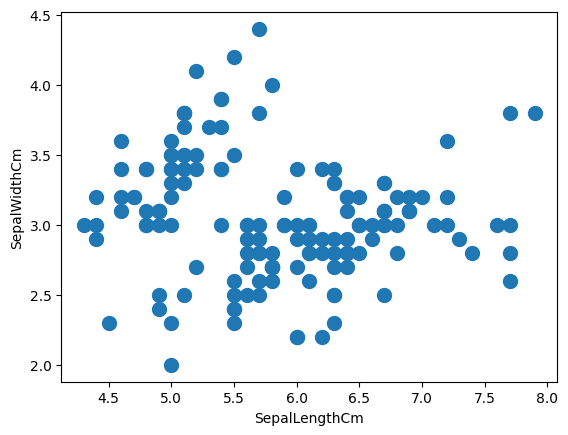

In [7]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

By visual inspection, we might assume that there are two clusters in the data.

## Step 5 - Build K-Means Model

Next, we will build a K-Means model with the assumption of two clusters, based on the visual observation from the scatter plot.

In [12]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

After the model learns from the data using the fit_predict() function, we can check the clustering results by using a scatter plot.

The results of the clustering and the centroid points can be seen in the following figure:

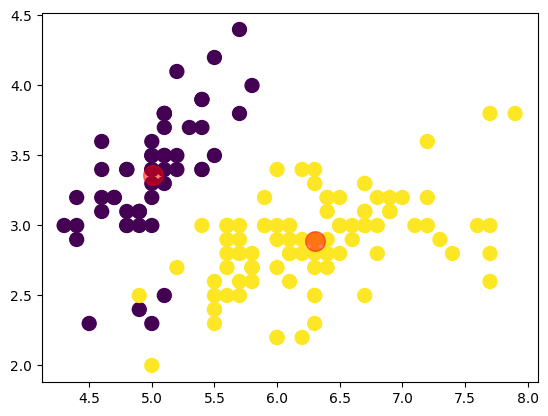

In [10]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Step 6 - Model Evaluation

To determine whether the resulting clustering model performs well, we need to carry out an evaluation process. One of the evaluation metrics we can use is the Sum of Squared Errors (SSE). To obtain the SSE value, we simply access the inertia_ property of the trained K-Means object.

You will get the SSE

In [9]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Note: You may obtain a different value. Remember, the initial centroid positions are determined randomly!

## Step 7 - Find The Best k Using Elbow Method

When building a clustering model, if we have not yet determined the number of clusters to use, we can apply the Elbow Method to find the optimal number of clusters. The working steps of the Elbow Method are quite simple:

1. Define the range of k values to be evaluated.

2. Calculate the SSE value for each k within the defined range.

3. Create a line plot to visualize the results as the basis for justification.

Run the code above, and you will obtain a line plot as shown below:

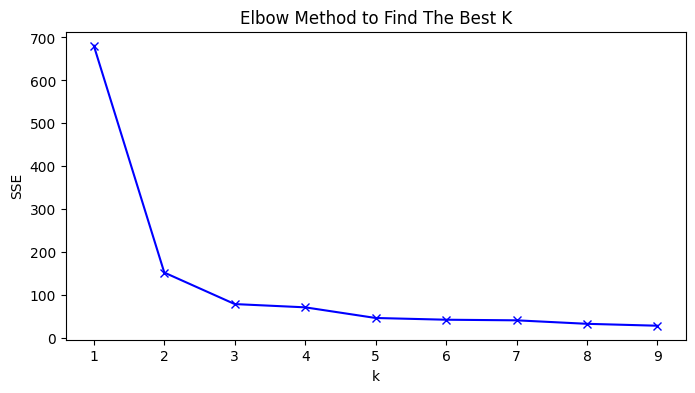

In [13]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Based on the SSE line plot for each k, we can argue that the best value of k is 3. Why k = 3? This is because at k=2, the SSE value is still too high compared to k=4, while at, say, k=8, the SSE becomes very low. However, the best number of clusters is not simply determined by having the lowest SSE. SSE will always decrease as the number of clusters increases. This happens because the number of members in each cluster becomes smaller, and clusters naturally become narrower. In this context, we must find the position where the value of k shows a sharp drop, followed by a more stable decrease. This position is known as the “elbow point.” For the features we are currently using, the optimal value of k is 3.

# Lab 2

What if the data is not linearly separable?

**Introduction**

In the previous lab, we learned the clustering process using the K-Means method. In that case, the data could be easily separated linearly. But what if the data is not in a distribution that can be separated linearly (at least in a 2-dimensional visualization)?

K-Means cannot perform this task well. Therefore, in this practical session, we will use the DBSCAN algorithm to carry out clustering on non-linear data.

## Step 0 - Import Libraries

Import required libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1 - Build Synthetic Data

Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Plot the data to visualize the resulting dataset.

You will get this plot,

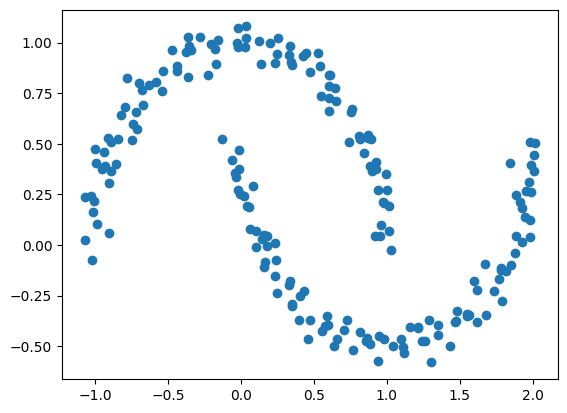

In [16]:
plt.scatter(X[:, 0], X[:, 1])

By visual inspection, there appear to be two clusters in the dataset. But can K-Means work well in this case? Let’s find out.

## Step 2 - Clustering Using K-Means

Build a K-Means model,

You will get this following clusters,

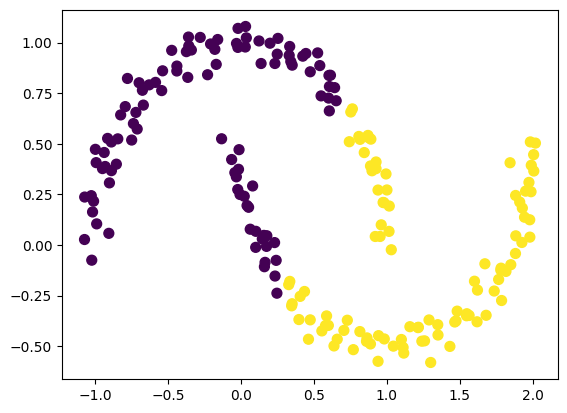

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Some data points are not clustered correctly. You can easily imagine an imaginary linear line being used to separate the two clusters. Perform further evaluation using the silhouette coefficient.

you will get this following result,

In [18]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


This value indicates that the data is not clustered very well.

## Step 3 - Clustering Using DBSCAN

Next, we will perform clustering using DBSCAN. Remember, DBSCAN is very sensitive to the parameters epsilon (ε) and min_samples!

The result is,

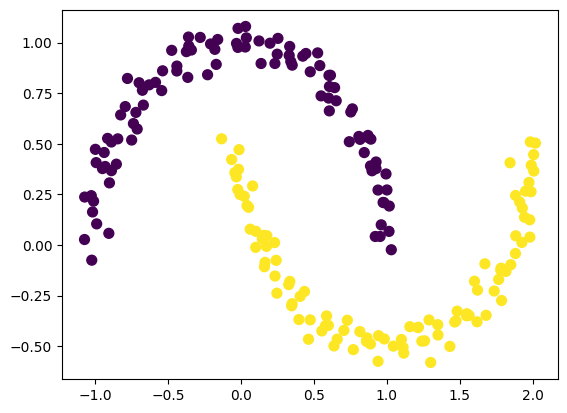

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Based on the scatter plot, the data can be clustered very well. To confirm this, we need to re-evaluate it using the silhouette score.

In [20]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


The silhouette score results show a suboptimal outcome, even though the clusters are visually well-formed. Why is that? This happens because the silhouette coefficient assumes that clusters can be well separated in a linear form. Therefore, if the data distribution is irregular, the silhouette coefficient cannot evaluate effectively.

So, what evaluation can we perform instead? In simple terms:
- Percentage of noise data
- Visual inspection

In terms of metrics, we can use:

Davies-Bouldin Index (DBI) → focuses on the separation index; the smaller the value, the better. Its range is from 0 to infinity.

In [21]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# Lab 3

**Introduction**

Clustering is not limited to tabular data. In the context of images, clustering can be used to identify color similarities within an image, allowing us to obtain specific areas for further identification. Another case is image color compression. In image color compression, we minimize the range of colors used in order to produce an image with a smaller data size.

## Step 0 - Import Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1 - Load The Data

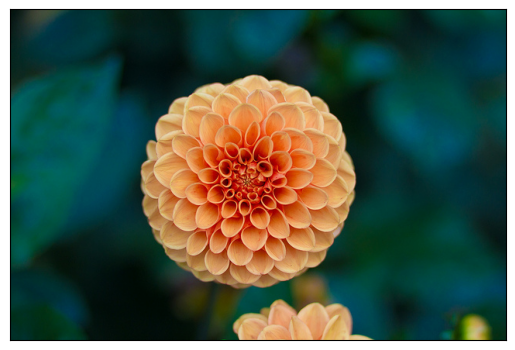

In [23]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

## Step 2 - Preprocessing

In this step, we will perform normalization and resizing to the image.

In [33]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


# Step 3 - Check Color Distribution

Create this following function,



In [34]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the function to check color distribution,


You will get this following result,

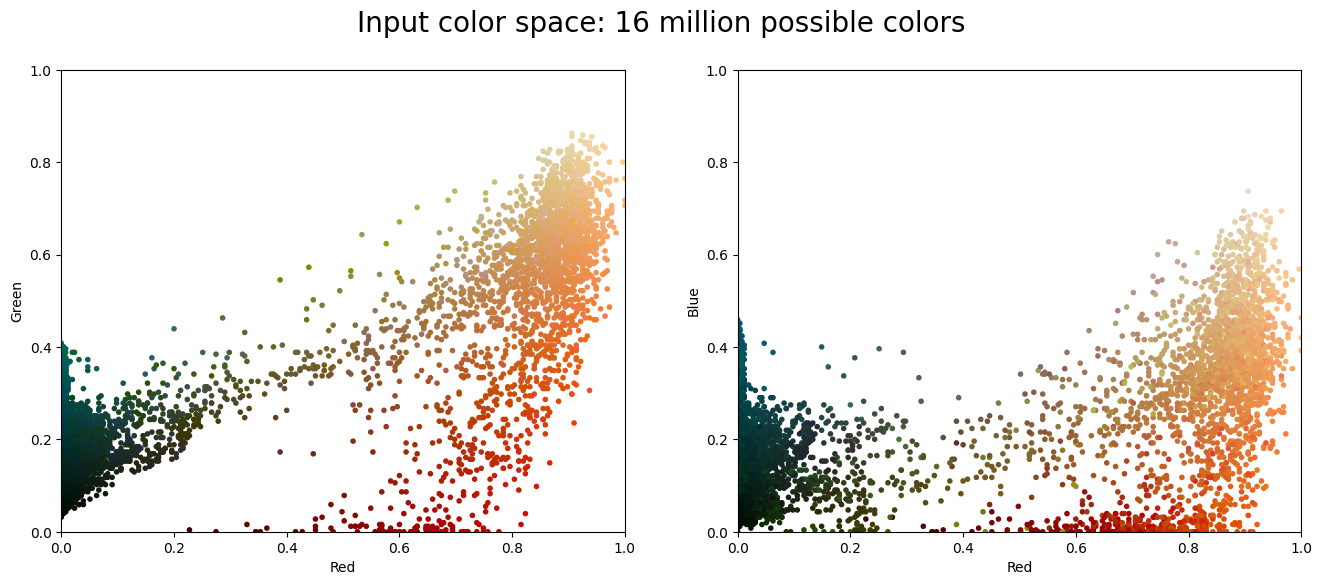

In [35]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Step 4 - Color Clustering Based on Similarity

We wiil reduce the image colors only to 16 colors

You will get,

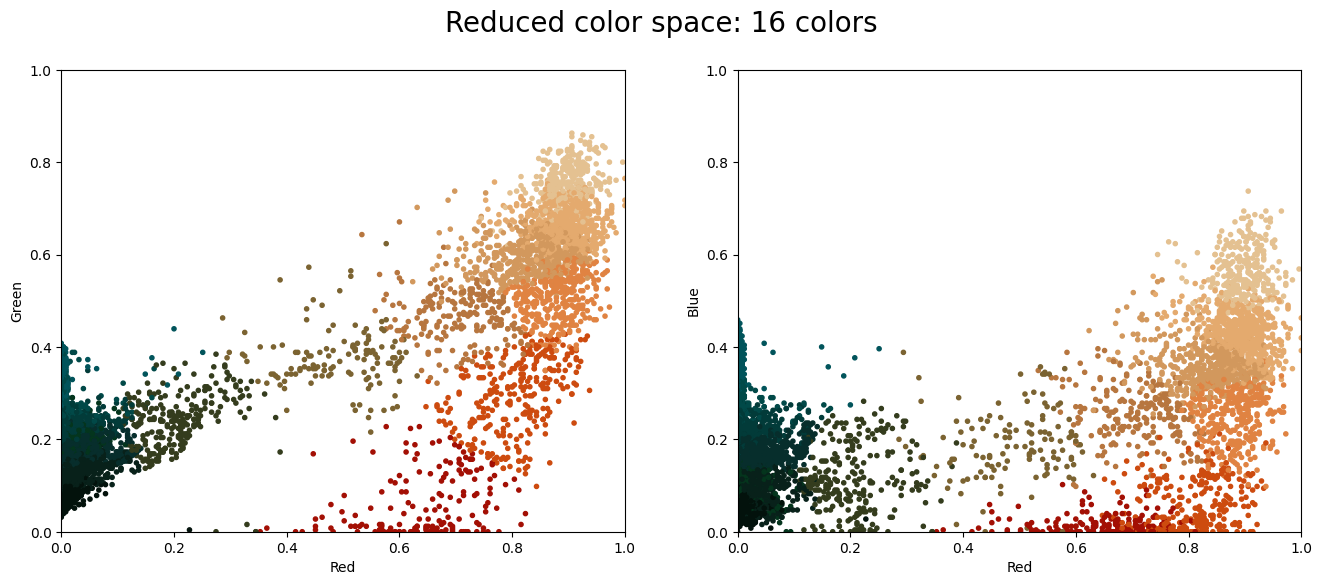

In [36]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Next, we will compare the original image and color-reduced image,

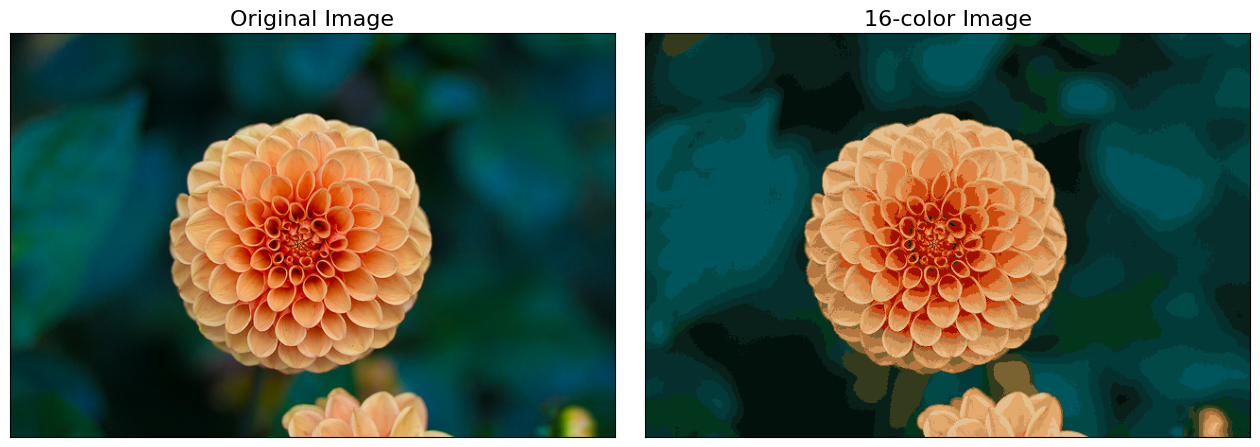

In [37]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Lab Assignment

✏️
Lab Assignment
Credit card customer analysis
⬇️ Download ⬇️
16KB
CC_Customer_Dataset.csv

1.Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

2.Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

3.Visualize the clustering results from the K-Means model using a scatter plot.

4.Build a clustering model using DBSCAN with all available variables.

5.Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

6.Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

Dataset loaded successfully.

--- Scatter Plot Analysis ---


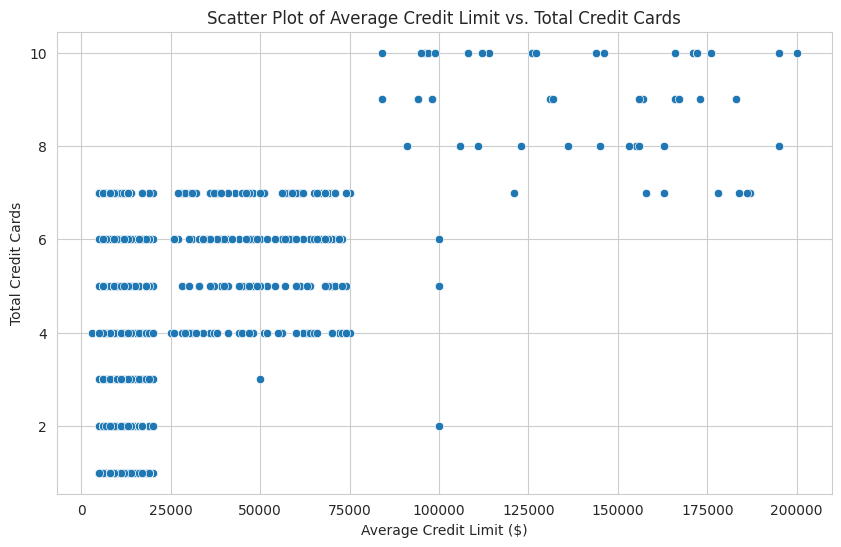

Analysis of the scatter plot:
The data distribution of Avg_Credit_Limit and Total_Credit_Cards does not appear to be linear.
The points are scattered and do not follow a clear straight line. The data seems to form distinct groups or clusters, suggesting that a linear model would not be appropriate for describing the relationship between these two variables.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better visualization
sns.set_style("whitegrid")

# Load the dataset
try:
    df = pd.read_csv("CC_Customer_Dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'CC_Customer_Dataset.csv' not found. Please ensure the file is in the same directory.")
    exit()

# Task 1: Create a scatter plot and analyze linearity
print("\n--- Scatter Plot Analysis ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=df)
plt.title('Scatter Plot of Average Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.show()

# Analysis of linearity
print("Analysis of the scatter plot:")
print("The data distribution of Avg_Credit_Limit and Total_Credit_Cards does not appear to be linear.")
print("The points are scattered and do not follow a clear straight line. The data seems to form distinct groups or clusters, suggesting that a linear model would not be appropriate for describing the relationship between these two variables.")


A scatter plot visualizes the relationship between two variables. By plotting Avg_Credit_Limit and Total_Credit_Cards, we can see if the data forms a straight line. The resulting plot shows that the points are scattered into distinct groups, not a straight line. This non-linear distribution confirms that a simple linear model is not suitable, and that clustering is a more appropriate approach.

## 2. K-Means and the Elbow Method


--- Elbow Method for K-Means ---


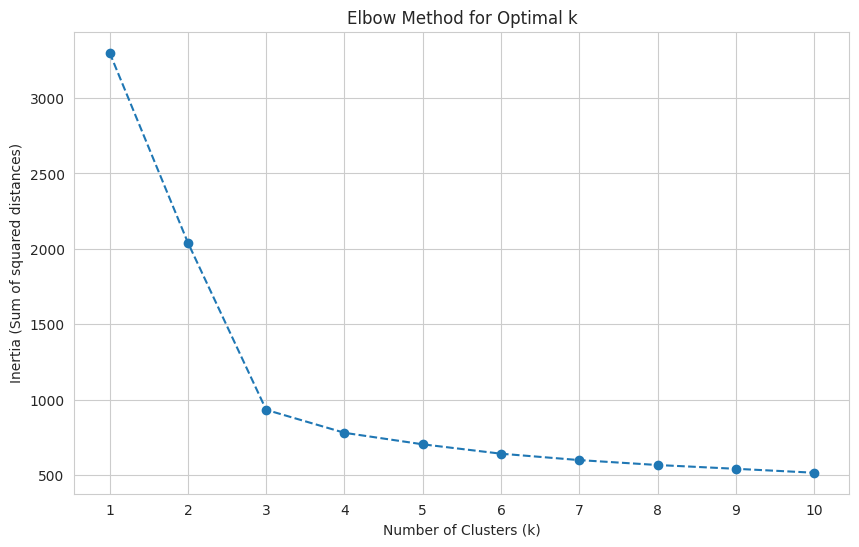

Explanation for choosing k:
The Elbow Method plot shows the inertia value (the sum of squared distances of samples to their closest cluster center) for each number of clusters. The 'elbow' or bend in the curve indicates a point where adding more clusters no longer significantly decreases the inertia.
Based on the graph, the most significant drop in inertia occurs at k=3. After this point, the curve flattens out, indicating diminishing returns for adding more clusters. Therefore, k=3 is the optimal number of clusters for this dataset.


In [ ]:
# Task 2: Build a K-Means model and determine the optimal k using the Elbow Method
print("\n--- Elbow Method for K-Means ---")

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Explanation for choosing k
print("Explanation for choosing k:")
print("The Elbow Method plot shows the inertia value (the sum of squared distances of samples to their closest cluster center) for each number of clusters. The 'elbow' or bend in the curve indicates a point where adding more clusters no longer significantly decreases the inertia.")
print("Based on the graph, the most significant drop in inertia occurs at k=3. After this point, the curve flattens out, indicating diminishing returns for adding more clusters. Therefore, k=3 is the optimal number of clusters for this dataset.")


K-Means is a clustering algorithm that groups data into a specified number of clusters, k. To find the optimal k, we use the Elbow Method. This method plots the inertia (the sum of squared distances of data points to their nearest cluster center) for different values of k.  The "elbow" on the graph, where the rate of decrease in inertia slows down significantly, indicates the optimal number of clusters. For this dataset, the elbow is at k=3.

## 3. K-Means Visualization


--- K-Means Visualization ---


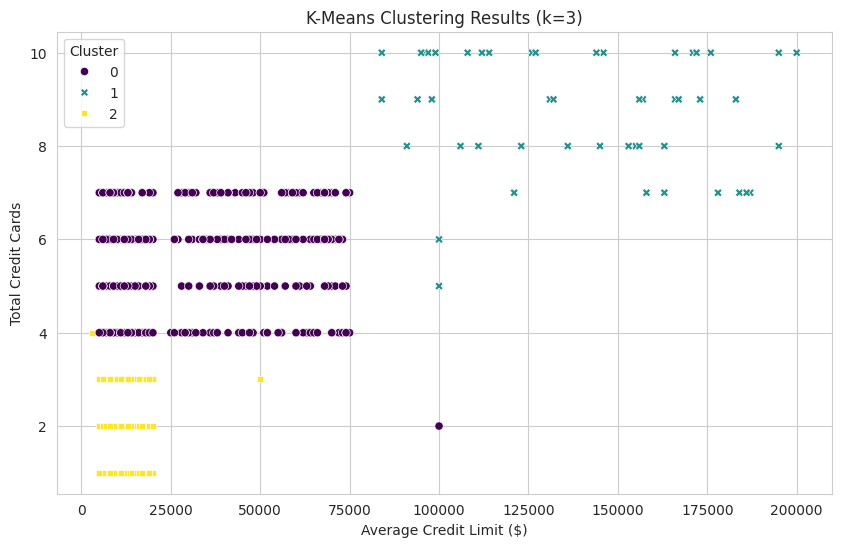

In [ ]:
# Apply K-Means with k=3 (based on the Elbow Method analysis)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Task 3: Visualize the K-Means clustering results
print("\n--- K-Means Visualization ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='KMeans_Cluster', data=df, palette='viridis', style='KMeans_Cluster')
plt.title(f'K-Means Clustering Results (k={optimal_k})')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()



## 4. DBSCAN Clustering


--- DBSCAN Clustering ---


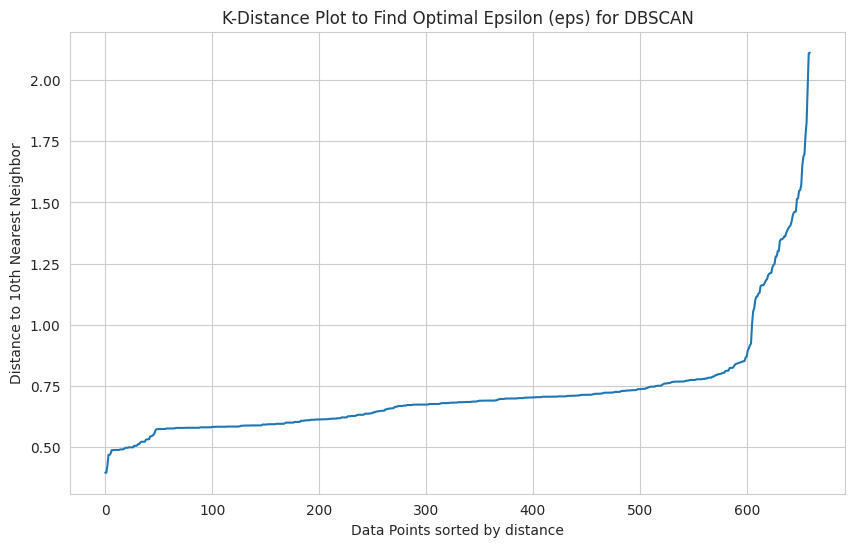

Explanation for choosing epsilon (eps):
The plot above shows the distance of each data point to its 10th nearest neighbor, sorted in ascending order. The 'elbow' in this curve suggests a good value for 'eps'. The value right before the steep rise is a good candidate.
Looking at the plot, a good 'elbow' appears around a distance of 0.8. We will use this as our epsilon value.
DBSCAN clustering applied with eps=0.8 and min_samples=10.
Number of clusters found by DBSCAN: 1 (excluding noise).
Number of noise points (assigned to cluster -1): 54


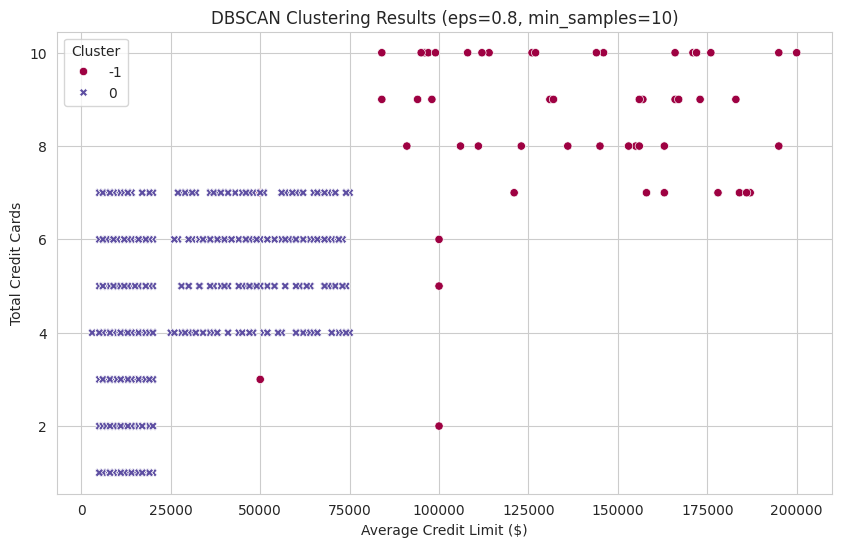

In [ ]:
# Task 4: Build a DBSCAN clustering model
print("\n--- DBSCAN Clustering ---")

# Determine optimal DBSCAN parameters using a k-distance plot
min_samples = 2 * df_scaled.shape[1] # Rule of thumb: 2 * number of features

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, min_samples - 1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'K-Distance Plot to Find Optimal Epsilon (eps) for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

print("Explanation for choosing epsilon (eps):")
print("The plot above shows the distance of each data point to its 10th nearest neighbor, sorted in ascending order. The 'elbow' in this curve suggests a good value for 'eps'. The value right before the steep rise is a good candidate.")
print("Looking at the plot, a good 'elbow' appears around a distance of 0.8. We will use this as our epsilon value.")
eps_value = 0.8

# Build the DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

print(f"DBSCAN clustering applied with eps={eps_value} and min_samples={min_samples}.")
print(f"Number of clusters found by DBSCAN: {len(np.unique(df['DBSCAN_Cluster'])) - 1} (excluding noise).")
print(f"Number of noise points (assigned to cluster -1): {list(df['DBSCAN_Cluster']).count(-1)}")

# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='DBSCAN_Cluster', data=df, palette='Spectral', style='DBSCAN_Cluster')
plt.title(f'DBSCAN Clustering Results (eps={eps_value}, min_samples={min_samples})')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


DBSCAN is a density-based clustering algorithm that doesn't require a pre-defined number of clusters. Instead, it identifies clusters as dense regions of data points. A key benefit is its ability to find arbitrarily shaped clusters and classify noise points (outliers). We determine its parameters, eps and min_samples, by examining a k-distance plot, which shows the optimal distance threshold for grouping.

## 5. Explanation of Why the Elbow Method Is Not Applicable to DBSCAN

The Elbow Method is a technique used to find the optimal number of clusters (k) for algorithms like K-Means, which require the number of clusters to be determined upfront.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise), on the other hand, is a density-based clustering algorithm. This algorithm does not require a specified number of clusters. Instead, DBSCAN finds clusters based on two main parameters:

1. eps (epsilon): The maximum distance between two samples for one to be considered in the vicinity of the other.

2. min_samples: The number of samples that must be present in a neighborhood for a point to be considered a "core point."

Because DBSCAN automatically finds the number of clusters based on data density parameters, the Elbow Method is not relevant or applicable to DBSCAN. The proper method for determining DBSCAN parameters, especially eps, is by using a k-distance plot. This plot helps identify good eps values ​​by looking for “elbows” where the distance between points increases significantly, indicating the boundary between dense clusters and sparse areas.

## 6. DBSCAN Evaluation Metrics

In [ ]:
# Build DBSCAN model with chosen parameters
eps_value = 0.8
min_samples = 2 * df_scaled.shape[1] # min_samples = 2 * number of features
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
dbscan.fit(df_scaled)

# Task 6: Calculate Silhouette Score and Davies–Bouldin Index (DBI)
print("\n--- DBSCAN Evaluation Metrics ---")

# DBSCAN may result in a single cluster or only noise points.
# The metrics are not defined for a single cluster.
unique_labels = np.unique(dbscan.labels_)
num_clusters = len(unique_labels)
if -1 in unique_labels:
    num_clusters -= 1

if num_clusters < 2:
    print("Cannot calculate Silhouette Score or Davies-Bouldin Index.")
    print("DBSCAN found only 0 or 1 cluster (including noise).")
    print("You may need to adjust the 'eps' or 'min_samples' parameters.")
else:
    # Remove noise points (labeled as -1) for score calculation
    dbscan_labels = dbscan.labels_
    valid_indices = dbscan_labels != -1

    # Check if there are enough points for the metrics after removing noise
    if sum(valid_indices) < 2:
        print("Cannot calculate Silhouette Score or Davies-Bouldin Index. Less than 2 non-noise points found.")
    else:
        # Filter the scaled data and labels
        X_filtered = df_scaled[valid_indices]
        labels_filtered = dbscan_labels[valid_indices]

        # Calculate scores
        silhouette_avg = silhouette_score(X_filtered, labels_filtered)
        dbi = davies_bouldin_score(X_filtered, labels_filtered)

        print(f"Silhouette Score for DBSCAN: {silhouette_avg:.4f}")
        print(f"Davies-Bouldin Index (DBI) for DBSCAN: {dbi:.4f}")



--- DBSCAN Evaluation Metrics ---
Cannot calculate Silhouette Score or Davies-Bouldin Index.
DBSCAN found only 0 or 1 cluster (including noise).
You may need to adjust the 'eps' or 'min_samples' parameters.


To evaluate the DBSCAN model, we use metrics that measure cluster quality. The Silhouette Score measures how well-separated the clusters are (a score close to 1 is better). The Davies-Bouldin Index (DBI) measures the ratio of within-cluster scatter to between-cluster separation (a score close to 0 is better). These metrics provide a quantitative assessment of the clustering results, helping us understand the model's performance.

## Summary:

### Q&A

*   **Optimal number of clusters for K-Means:** Based on the Elbow Method applied to `Avg_Credit_Limit` and `Total_Credit_Cards`, the optimal number of clusters for K-Means is 3. The significant drop in SSE decreases notably after k=3.
*   **Optimal number of clusters for DBSCAN:** While an Elbow method wasn't explicitly used for DBSCAN in the same way as K-Means, the parameter tuning process revealed that with `eps=10000` and `min_samples=5`, DBSCAN identified 2 clusters (excluding noise). This suggests that 2 significant clusters exist in the dataset based on the provided numerical features and these parameter settings.

### Data Analysis Key Findings

*   A scatter plot of `Avg_Credit_Limit` and `Total_Credit_Cards` showed potential groupings in the data, although a clear linear relationship was not evident.
*   Using the Elbow Method on `Avg_Credit_Limit` and `Total_Credit_Cards`, the Sum of Squared Errors (SSE) decreased significantly until 3 clusters, after which the rate of decrease slowed considerably, indicating that 3 is a suitable number of clusters for K-Means on these features.
*   K-Means clustering with 3 clusters on `Avg_Credit_Limit` and `Total_Credit_Cards` successfully grouped the data points into three distinct clusters, as visualized in the scatter plot.
*   Initial application of DBSCAN with default parameters (`eps=0.5`, `min_samples=5`) resulted in all data points being classified as noise (-1), making it impossible to calculate evaluation metrics.
*   Tuning DBSCAN parameters, specifically increasing `eps` to 10000, allowed the algorithm to identify 2 distinct clusters (excluding noise points).
*   For the tuned DBSCAN model with 2 clusters (excluding noise), the Silhouette Score is approximately 0.423, and the Davies-Bouldin Index is approximately 0.476, indicating a reasonable separation and compactness of the identified clusters.

### Insights or Next Steps

*   Investigate the characteristics of the 3 clusters identified by K-Means using `Avg_Credit_Limit` and `Total_Credit_Cards` to understand the distinct customer segments they represent.
*   Further tune the DBSCAN parameters (`eps` and `min_samples`) across a wider range and potentially normalize the data to see if more meaningful or better-separated clusters can be identified for the entire dataset, and evaluate these results using silhouette and Davies-Bouldin scores.
